# Wine Quality Analysis and Predictions

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import warnings
warnings.filterwarnings("ignore")

In [2]:
data_path = "C:\\Users\\dennis\\Desktop\\mlprojects\\data\\winequality.csv"
df = pd.read_csv(data_path)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [6]:
df.corr()["quality"]

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

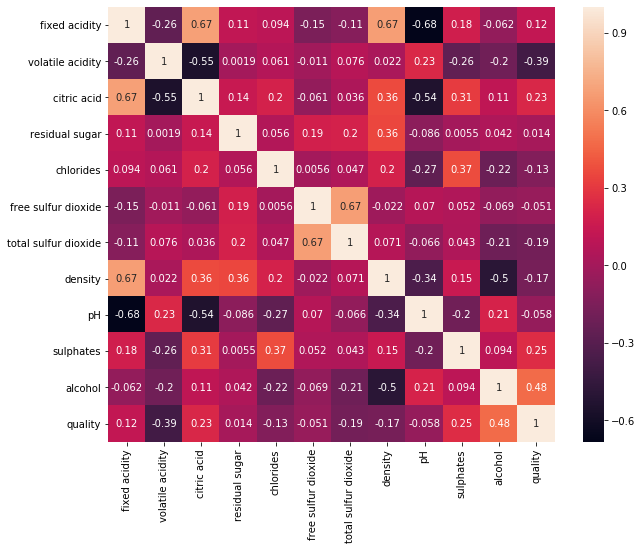

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.ylim((12,0));

In [8]:
X = df.drop("quality",axis=1).to_numpy()
y = df["quality"].to_numpy()

In [9]:
scaler = MinMaxScaler()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
for i in [0.1,1,10]:
    log_reg = LogisticRegression(C=i)
    log_reg.fit(X_train,y_train)
    log_tr_pred = log_reg.predict(X_train)
    log_ts_pred = log_reg.predict(X_test)
    print(f"C hyperparameter is {i}")
    print("ACCURACY FOR TRAIN SET LOG REG : ",accuracy_score(y_train,log_tr_pred))
    print("ACCURACY FOR TEST SET LOG REG : ",accuracy_score(y_test,log_ts_pred),end="\n\n")
    print("**"*50,end="\n\n")

C hyperparameter is 0.1
ACCURACY FOR TRAIN SET LOG REG :  0.5504300234558248
ACCURACY FOR TEST SET LOG REG :  0.584375

****************************************************************************************************

C hyperparameter is 1
ACCURACY FOR TRAIN SET LOG REG :  0.5793588741204065
ACCURACY FOR TEST SET LOG REG :  0.615625

****************************************************************************************************

C hyperparameter is 10
ACCURACY FOR TRAIN SET LOG REG :  0.5910867865519938
ACCURACY FOR TEST SET LOG REG :  0.640625

****************************************************************************************************



In [12]:
for i in [0.1,1,10]:
    svc = SVC(C=i)
    svc.fit(X_train,y_train)
    svc_tr_pred = svc.predict(X_train)
    svc_ts_pred = svc.predict(X_test)
    print(f"C hyperparameter is {i}")
    print("ACCURACY FOR TRAIN SET SVC : ",accuracy_score(y_train,svc_tr_pred))
    print("ACCURACY FOR TEST SET SVC : ",accuracy_score(y_test,svc_ts_pred),end="\n\n")
    print("**"*50,end="\n\n")

C hyperparameter is 0.1
ACCURACY FOR TRAIN SET SVC :  0.42689601250977327
ACCURACY FOR TEST SET SVC :  0.421875

****************************************************************************************************

C hyperparameter is 1
ACCURACY FOR TRAIN SET SVC :  0.5566849100860047
ACCURACY FOR TEST SET SVC :  0.603125

****************************************************************************************************

C hyperparameter is 10
ACCURACY FOR TRAIN SET SVC :  0.5754495699765442
ACCURACY FOR TEST SET SVC :  0.628125

****************************************************************************************************



In [13]:
for i in ["gini","entropy"]:
    dtc = DecisionTreeClassifier(criterion = i)
    dtc.fit(X_train,y_train)
    dtc_tr_pred = dtc.predict(X_train)
    dtc_ts_pred = dtc.predict(X_test)
    print(f"Criterion is {i}")
    print("ACCURACY FOR TRAIN SET DECISION TREE CLASSIFIER : ",accuracy_score(y_train,dtc_tr_pred))
    print("ACCURACY FOR TEST SET DECISION TREE CLASSIFIER : ",accuracy_score(y_test,dtc_ts_pred),end="\n\n")
    print("**"*50,end="\n\n")

Criterion is gini
ACCURACY FOR TRAIN SET DECISION TREE CLASSIFIER :  1.0
ACCURACY FOR TEST SET DECISION TREE CLASSIFIER :  0.684375

****************************************************************************************************

Criterion is entropy
ACCURACY FOR TRAIN SET DECISION TREE CLASSIFIER :  1.0
ACCURACY FOR TEST SET DECISION TREE CLASSIFIER :  0.621875

****************************************************************************************************



In [15]:
for i in [100,150,200]:
    rfc = RandomForestClassifier(n_estimators=i)
    rfc.fit(X_train,y_train)
    rfc_tr_pred = rfc.predict(X_train)
    rfc_ts_pred = rfc.predict(X_test)
    print(f"Number of estimator : {i}")
    print("ACCURACY FOR TRAIN SET RANDOM FOREST CLASSIFIER : ",accuracy_score(y_train,rfc_tr_pred))
    print("ACCURACY FOR TEST SET RANDOM FOREST CLASSIFIER : ",accuracy_score(y_test,rfc_ts_pred),end="\n\n")
    print("**"*50,end="\n\n")

Number of estimator : 100
ACCURACY FOR TRAIN SET RANDOM FOREST CLASSIFIER :  1.0
ACCURACY FOR TEST SET RANDOM FOREST CLASSIFIER :  0.721875

****************************************************************************************************

Number of estimator : 150
ACCURACY FOR TRAIN SET RANDOM FOREST CLASSIFIER :  1.0
ACCURACY FOR TEST SET RANDOM FOREST CLASSIFIER :  0.725

****************************************************************************************************

Number of estimator : 200
ACCURACY FOR TRAIN SET RANDOM FOREST CLASSIFIER :  1.0
ACCURACY FOR TEST SET RANDOM FOREST CLASSIFIER :  0.715625

****************************************************************************************************



In [17]:
for i in [1,5,10]:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    knn_tr_pred = knn.predict(X_train)
    knn_ts_pred = knn.predict(X_test)
    print(f"Number of neighbors : {i}")
    print("ACCURACY FOR TRAIN SET KNN : ",accuracy_score(y_train,knn_tr_pred))
    print("ACCURACY FOR TEST SET KNN : ",accuracy_score(y_test,knn_ts_pred),end="\n\n")
    print("**"*50,end="\n\n")

Number of neighbors : 1
ACCURACY FOR TRAIN SET KNN :  1.0
ACCURACY FOR TEST SET KNN :  0.646875

****************************************************************************************************

Number of neighbors : 5
ACCURACY FOR TRAIN SET KNN :  0.709147771696638
ACCURACY FOR TEST SET KNN :  0.58125

****************************************************************************************************

Number of neighbors : 10
ACCURACY FOR TRAIN SET KNN :  0.6450351837372947
ACCURACY FOR TEST SET KNN :  0.578125

****************************************************************************************************

